In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/sony/Desktop/datascience/Bike-Purchase/Bike.csv')
df.head()

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes


In [3]:
df.shape

(6997, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6996 non-null   float64
 1   Marital Status    6981 non-null   object 
 2   Gender            6968 non-null   object 
 3   Yearly Income     6997 non-null   int64  
 4   Children          6979 non-null   float64
 5   Education         6997 non-null   object 
 6   Occupation        6997 non-null   object 
 7   Home Owner        6997 non-null   object 
 8   Cars              6997 non-null   int64  
 9   Commute Distance  6968 non-null   float64
 10  Region            6997 non-null   object 
 11  Age               6997 non-null   int64  
 12  Bike Buyer        6997 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 710.8+ KB


In [5]:
df.describe()

,ID,Yearly Income,Children,Cars,Commute Distance,Age
count,6996.000000,6997.000000,6979.000000,6997.000000,6968.000000,6997.000000
mean,17744.435249,57020.151493,1.111621,1.586823,4.210103,45.107332
std,4337.428859,32080.449720,1.600912,1.146782,2.926211,11.916654
min,2.000000,0.000000,0.000000,0.000000,1.000000,25.000000
25%,14249.750000,30000.000000,0.000000,1.000000,1.000000,36.000000
50%,17406.500000,60000.000000,0.000000,2.000000,4.000000,44.000000
75%,20609.500000,70000.000000,2.000000,2.000000,6.000000,53.000000
max,29476.000000,170000.000000,5.000000,4.000000,13.000000,96.000000


In [6]:
df['Commute Distance'].unique()

array([ 1.,  2.,  5., nan, 10., 11.,  6., 12.,  9.,  8., 13.,  3.,  4.,
        7.])

In [7]:
df.isnull().sum()

ID                   1
Marital Status      16
Gender              29
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

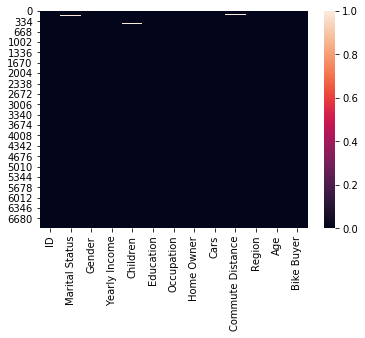

In [8]:
sns.heatmap(df.isna())

## Outliers Detection 

In [9]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(10, 4))

    
    # boxplot
    plt.subplot(1, 1, 1)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* Yearly Income


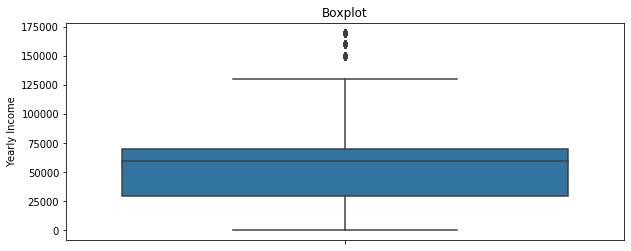

******* Age


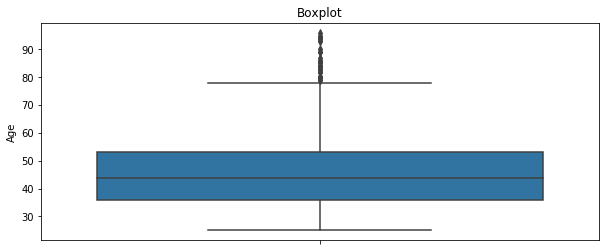

******* Children


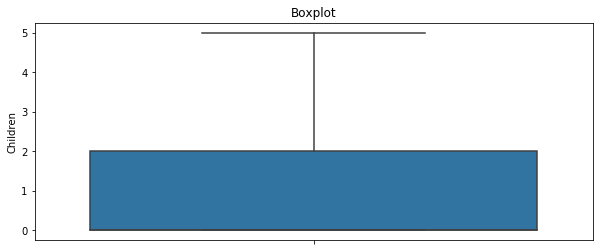

******* Commute Distance


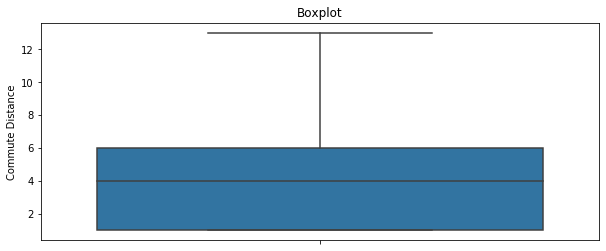

******* Cars


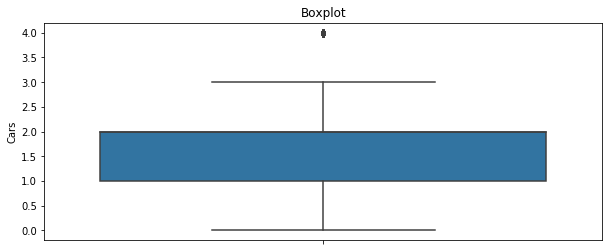

In [10]:
num_var = ["Yearly Income","Age","Children","Commute Distance","Cars"]
for var in num_var:
  print("*******" ,var)
  diagnostic_plots(df, var)

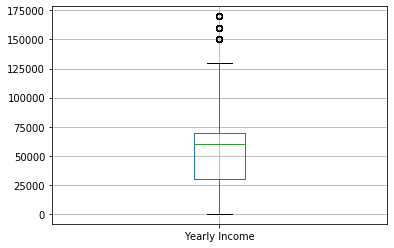

In [11]:
df.boxplot(column = 'Yearly Income')

In [12]:
median= df.loc[df["Yearly Income"]<135000,'Yearly Income'].median()

In [13]:
df.loc[df['Yearly Income'] >135000,'Yearly Income']=np.nan

In [14]:
df['Yearly Income'].fillna(median, inplace=True)

In [15]:
df['Yearly Income'].max()

130000.0

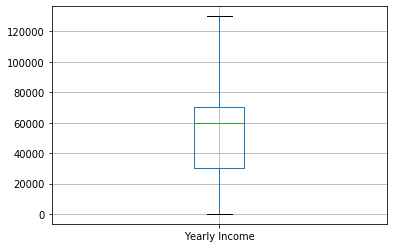

In [16]:
df.boxplot(column = 'Yearly Income')

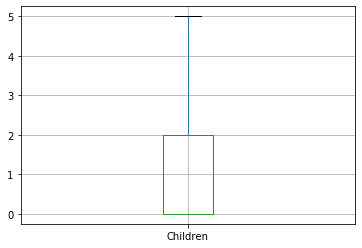

In [17]:
df.boxplot(column = 'Children')

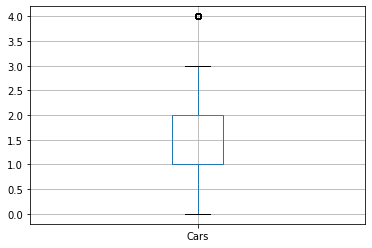

In [18]:
df.boxplot(column = 'Cars')

In [19]:
median = df.loc[df['Cars']<3,'Cars'].median()

In [20]:
df.loc[df['Cars']>3,'Cars']=np.nan

In [21]:
df['Cars'].fillna(median, inplace=True)

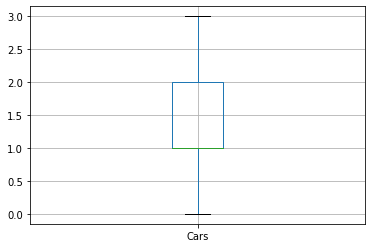

In [22]:
df.boxplot(column = 'Cars')

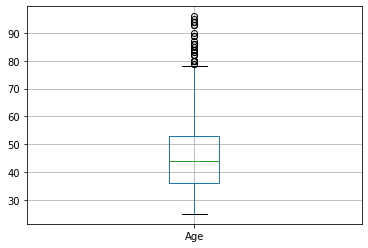

In [23]:
df.boxplot(column = 'Age')

In [24]:
median = df.loc[df['Age']<75,'Age'].median()

In [25]:
df.loc[df['Age']>75,'Age']=np.nan

In [26]:
df['Age'].fillna(median, inplace=True)

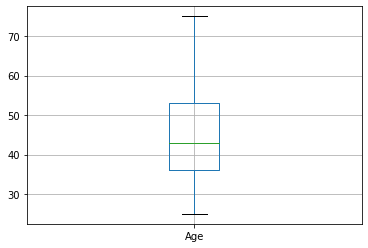

In [27]:
df.boxplot(column = 'Age')

In [28]:
df.isnull().sum()

ID                   1
Marital Status      16
Gender              29
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

In [29]:
df['Children'].mean()

1.1116205760137556

In [30]:
df['Home Owner'].mode()

0    Yes
dtype: object

In [31]:
df['Commute Distance'].mean()

4.210103329506315

In [32]:
df['Marital Status'].fillna(df['Marital Status'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Children'].fillna(df['Children'].mean(), inplace=True)
df['Home Owner'].fillna(df['Home Owner'].mode()[0], inplace=True)
df['Commute Distance'].fillna(df['Commute Distance'].mean(), inplace=True)

In [33]:
df.isnull().sum()

ID                  1
Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Bike Buyer          0
dtype: int64

In [34]:
df.drop('ID', inplace=True, axis=1)

In [35]:
df.head()

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000.0,0.0,Partial College,Clerical,No,1.0,1.0,Europe,33.0,Yes
1,Married,Female,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,1.0,Europe,37.0,Yes
2,Married,Male,60000.0,5.0,Partial College,Professional,No,3.0,2.0,Europe,55.0,No
3,Single,Male,60000.0,0.0,Graduate Degree,Management,Yes,2.0,5.0,Pacific,47.0,No
4,Married,Female,70000.0,2.0,Bachelors,Skilled Manual,No,1.0,1.0,North America,38.0,Yes


In [36]:
X = df.drop('Bike Buyer', axis=1).values
y = df['Bike Buyer'].values

In [37]:
X

array([['Single', 'Male', 30000.0, ..., 1.0, 'Europe', 33.0],
       ['Married', 'Female', 40000.0, ..., 1.0, 'Europe', 37.0],
       ['Married', 'Male', 60000.0, ..., 2.0, 'Europe', 55.0],
       ...,
       ['Married', 'Female', 60000.0, ..., 1.0, 'Europe', 53.0],
       ['Single', 'Female', 120000.0, ..., 1.0, 'Europe', 54.0],
       ['Married', 'Male', 130000.0, ..., 2.0, 'Europe', 54.0]],
      dtype=object)

In [38]:
#Handling missing Categorical values
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#imputer.fit(X)
#X = imputer.transform(X)

In [39]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le_X = LabelEncoder()
le_y = LabelEncoder()
X[:,0] = le_X.fit_transform(X[:,0])
X[:,1] = le_X.fit_transform(X[:,1])
X[:,4] = le_X.fit_transform(X[:,4])
X[:,5] = le_X.fit_transform(X[:,5])
X[:,6] = le_X.fit_transform(X[:,6])
X[:,9] = le_X.fit_transform(X[:,9])
y = le_y.fit_transform(y)

In [40]:
X

array([[1, 1, 30000.0, ..., 1.0, 0, 33.0],
       [0, 0, 40000.0, ..., 1.0, 0, 37.0],
       [0, 1, 60000.0, ..., 2.0, 0, 55.0],
       ...,
       [0, 0, 60000.0, ..., 1.0, 0, 53.0],
       [1, 0, 120000.0, ..., 1.0, 0, 54.0],
       [0, 1, 130000.0, ..., 2.0, 0, 54.0]], dtype=object)

In [41]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[1.        , 1.        , 0.23076923, ..., 0.        , 0.        ,
        0.16      ],
       [0.        , 0.        , 0.30769231, ..., 0.        , 0.        ,
        0.24      ],
       [0.        , 1.        , 0.46153846, ..., 0.08333333, 0.        ,
        0.6       ],
       ...,
       [0.        , 0.        , 0.46153846, ..., 0.        , 0.        ,
        0.56      ],
       [1.        , 0.        , 0.92307692, ..., 0.        , 0.        ,
        0.58      ],
       [0.        , 1.        , 1.        , ..., 0.08333333, 0.        ,
        0.58      ]])

In [42]:
#Splting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5597, 11)
(1400, 11)
(5597,)
(1400,)


In [44]:
#feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [45]:
X_train

array([[1, 0, 80000.0, ..., 1.0, 1, 33.0],
       [0, 1, 10000.0, ..., 1.0, 0, 48.0],
       [1, 0, 20000.0, ..., 2.0, 0, 46.0],
       ...,
       [0, 1, 100000.0, ..., 1.0, 2, 47.0],
       [0, 0, 50000.0, ..., 3.0, 1, 65.0],
       [0, 0, 70000.0, ..., 1.0, 1, 37.0]], dtype=object)

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [47]:
KNN_pred = KNN.predict(X_test)

In [48]:
KNN.score(X_train,y_train)

0.8710023226728605

In [49]:
from sklearn.metrics import accuracy_score
print("Accuracy of KNN Classifier",accuracy_score(y_test,KNN_pred)*100)

Accuracy of KNN Classifier 85.0


## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state = 0)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
RFC_pred = RFC.predict(X_test)

In [52]:
RFC.score(X_train, y_train)

0.9812399499732

In [53]:
RFC.score(X_test,y_test)

0.8514285714285714

In [54]:
print("Accuracy of RFc Classifier",accuracy_score(y_test,RFC_pred)*100)

Accuracy of RFc Classifier 85.14285714285714


## XGB classifier

In [55]:
from xgboost import XGBClassifier
XG = XGBClassifier()
XG.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
XG_pred = XG.predict(X_test)

In [57]:
print(XG.score(X_train, y_train))
print(XG.score(X_test,y_test))

0.9401465070573521
0.85


## Decision Tree classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [59]:
DT_pred=DT.predict(X_test)

In [60]:
DT.score(X_train, y_train)

0.9812399499732

In [61]:
print("Accuracy of DT Classifier",accuracy_score(y_test,DT_pred)*100)

Accuracy of DT Classifier 82.21428571428572


## Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
LR_pred = LR.predict(X_test)

In [64]:
LR.score(X_train, y_train)

0.8609969626585671

In [65]:
from sklearn.metrics import accuracy_score
print("Accuracy of LR Classifier",accuracy_score(y_test,LR_pred)*100)

Accuracy of LR Classifier 84.14285714285714


# SVM

In [66]:
from sklearn.svm import SVC
SV = SVC(kernel = 'rbf', random_state = 0)
SV.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [67]:
y_pred = SV.predict(X_test)

In [68]:
SV.score(X_train,y_train)

0.8609969626585671

In [69]:
SV.score(X_test, y_test)

0.8414285714285714